# Python Challenge: Chess Game Analysis

This project analyzes virtual chess games that are stored in a `.pgn` format. This file contains a set of game moves for each chess game. The goal is to extract the black piece moves and white piece moves separately and visualise the 10 most common moves throughout the game file.

## 1. Importing the Libraries

Let us import the necessary libraries required for this task.

In [1]:
# Importing all the necessary libraries
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Code Operations

The below description lists the set of operations that were performed to achieve the final visualisation in the form of a bar chart. The bulk of these operations are contained in a Python class that can be reused in another code as required.

**NOTE: Please go through the below text to better understand the tasks being performed by the code
and the information being derived from the final plot.**

Code Description: 

The sequence of execution for different pieces of code in this project is given as follows:

### 2.1 regex_filter

1. Read from the .pgn file.
2. Identify game metadata format.
3. Remove game metadata.
4. Identify game score format at the end of each game.
5. Remove the game score.
6. Write clean file to game_strings.txt.

### 2.2 moves_generator

7. Read from game_strings.txt.
8. Extract white moves for each game.
9. Extract black moves for each game.
9. Write game files for white moves and black moves.
10. Print the number of files which have been created.


### 2.3 first_move

11. Read from game_strings.txt.
12. Extract white first moves. 
13. Extract black first moves.
14. Extract unique white first moves.
15. Count all white first moves.
16. Extract unique black first moves.
17. Count all black first moves.

### 2.4 chess_moves_plot

18. Call the method first_move.
19. Retrieve the tuple containing the two data frames.
20. Separate the two data frames from the tuple.
21. Add a new column to each data frame to identify the type of move
22. Merge the two data frames into one.
23. Sort the combined data frame in descending order.
24. Extract the top 10 first moves from the dataframe.
25. Define a colour palette for the legend and to identify a chess move as black or white.
26. Plot the top 10 first moves on a bar plot.
27. Label the x-axis and y-axis.
28. Specify the title for the plot.
29. Add colours and a legend to the plot.
30. Display the plot.

### 2.5 Calling the Methods of the Class ChessGame (Driver Code):

1. Ask the user to input the name of a valid .pgn file to be read. Only existing .pgn files are accepted.
2. Create an instance of the object of class ChessGame with the .pgn file.
3. Call the regex_filter method with the above instance.
4. Close the .pgn file to release the read lock on the file.
5. Create a second instance of the object of class ChessGame with the newly created clean game.
strings file.
6. Call the moves_generator method with the above instance.
7. Close the game strings file to release the read lock on the file
8. Create a third instance of the object of class ChessGame with the same clean game strings file.
9. Call the chess_moves_plot method with the above instance.
10. Close the game strings file.

Enter the name of the file to be parsed along with its extension( Example: chess_game.pgn): chess_game.pgn
Success! Game Strings File Created in Current Directory
White moves files: 2110
Black moves files: 2110
Total number of files created: 4220
Success!

  Move  Number_of_Occurrences   Type
0   d4                    907  White
1   e4                    828  White
2  Nf6                    787  Black
3   c5                    504  Black
4   d5                    287  Black
5   e5                    246  Black
6  Nf3                    186  White
7   c4                    179  White
8   e6                    113  Black
9   g6                     57  Black


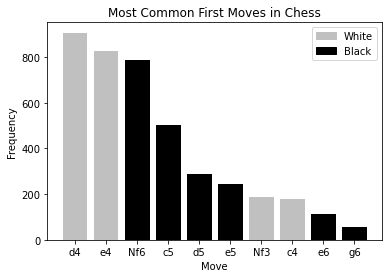

In [1]:
# Defining a class called ChessGame. All the required operations will be conducted inside this class
class ChessGame:

    # Defining the object of class ChessGame using the init constructor method
    def __init__(self, chess_games):
        self.chess_games = chess_games

    # ################### 3.2: Filtering the Game Data ################### #

    # Defining a method to filter the .pgn game file
    def regex_filter(self):

        # Defining three different regex patterns to remove the game metadata and final scores
        # from the chess.pgn file
        pattern = re.compile(r"\[(.*?)\]")  # Regex pattern to isolate the game metadata
        pattern2 = re.compile(r"\d+/\d+-\d+/\d+")  # Regex pattern if the final score is a draw (1/2-1/2)
        pattern3 = re.compile(r"\d+-\d+")  # Regex pattern if the final score is a win (1-0) or a loss (0-1)

        # Defining a file to write the clean game strings to
        clean_game_file = open('game_string.txt', 'w')

        # Reading each line of the .pgn file being
        lines = self.chess_games.readlines()

        # Join the elements of the above iterable into one string and remove the chess games
        # metadata using the regex pattern defined for it
        my_string = ' '.join([line.strip() for line in lines if not re.match(pattern, line)])

        # The above join operation has created a whitespace to the left of the string so this
        # step will remove that whitespace
        my_string = my_string.lstrip()

        # Putting the partially clean game string in a list
        # Each game string will be an individual element in this list
        regex_list = my_string.split('   ')

        # Check the partially cleaned list of game strings by uncommenting the next line.
        # This step is optional
        # print(regex_list)

        # For loop to remove the score at the end of each game using two different regex
        # patterns and write each clean game string to each line of the game_string.txt file
        for element in range(0, len(regex_list)):
            regex_list[element] = re.sub(pattern2, "", regex_list[element])
            regex_list[element] = re.sub(pattern3, "", regex_list[element])
            regex_list[element] = regex_list[element].rstrip()
            clean_game_file.writelines(regex_list[element] + "\n")

        # Printing confirmation of the game strings file being created successfully
        print(f"Success! Game Strings File Created in Current Directory")

        # Close the game_string.txt file
        clean_game_file.close()

        # Check the fully cleaned list of game strings by uncommenting the next line.
        # This step is optional
        # print(regex_list)

    # ################### 3.3: Sub Files ################### #

    # Defining a method to create two separate moves files for each game
    def moves_generator(self):

        # Read each line of the newly created game_strings file passed as an instance
        # of the object of class ChessGame
        lines = self.chess_games.readlines()

        # Defining a regex pattern to remove trailing numbers for each move pair.
        # For eg. 1.e4 d3 to e4 d3
        pattern4 = re.compile(r"\d{1,3}\.")

        # Defining a for loop to access each line of the file
        for line in range(0, len(lines)):
            # Capture the above defined regex pattern and remove it from every
            # line in the file
            lines[line] = re.sub(pattern4, "", lines[line])

            # Converting each game string into its individual list. Each list
            # will contain individual game moves as list elements
            game = lines[line].split()

            # Incrementing the index value by 1 so that the game number in the
            # white moves and black moves files starts from 1 instead of 0
            game_number = line + 1

            # Splitting the games into two separate lists containing only the white moves
            # and black moves respectively
            # Source: https://realpython.com/python-enumerate/
            white = [move for j, move in enumerate(game) if j % 2 == 0]
            black = [move for j, move in enumerate(game) if j % 2 != 0]

            # Writing the list of white moves for each game to their respective game files
            with open(f"{game_number}w.txt", 'w') as white_moves:
                white_moves.write(' '.join(white))

            # Writing the list of black moves for each game to their respective game files
            with open(f"{game_number}b.txt", 'w') as black_moves:
                black_moves.write(' '.join(black))

        # To report the number of files which have been created, we can use the listdir method from the os module
        # Using the os module, we can extract the path of the current working directory with the .getcwd method
        white_file = [file for file in os.listdir(os.getcwd()) if file.endswith("w.txt")]
        black_file = [file for file in os.listdir(os.getcwd()) if file.endswith("b.txt")]

        # Printing the number of files created for white moves and black moves per game
        print(f"White moves files: {len(white_file)}")
        print(f"Black moves files: {len(black_file)}")

        # Printing the total number of files created including the black and white moves files
        print(f"Total number of files created: {len(white_file) + len(black_file)}")

        # Confirmation of successful files creation
        print("Success!\n")

    # ################### 3.4: Dataframe Counts ################### #

    # Defining a method to generate different moves files for white moves and black moves
    def first_move(self):

        # Reading from the game_string.txt file
        lines = self.chess_games.readlines()

        # Defining a regex pattern to remove trailing numbers for each move pair. For eg. 1.e4 d3 to e4 d3
        pattern4 = re.compile(r"\d{1,3}\.")

        # Defining a for loop to access each line of the file
        for line in range(0, len(lines)):
            # Capture the above defined regex pattern and remove it from every line in the file
            lines[line] = re.sub(pattern4, "", lines[line])
            lines[line] = lines[line].split()

        # Pulling the white first moves and black first moves of every game into their individual lists
        white_first_moves = [game[0] for game in lines]

        # A game may have only one move so this will only record the black first moves only if
        # they exist in the game
        black_first_moves = [game[1] for game in lines if len(game) > 1]

        # Putting all the first white moves and first black moves into a NumPy array
        white_first_moves_np = np.array(white_first_moves)
        black_first_moves_np = np.array(black_first_moves)

        # Collecting all the unique moves for white and black moves and the number of occurrences
        # for each of them using the unique() method of NumPy and the count flag set to True.
        white_first_moves_np_unq, white_counts = np.unique(white_first_moves_np, return_counts=True)
        black_first_moves_np_unq, black_counts = np.unique(black_first_moves_np, return_counts=True)

        # Creating two nested arrays. Each inner array contains all the first moves and the number of
        # times it has occurred throughout all the games
        white_frequency = np.asarray((white_first_moves_np_unq, white_counts)).T
        black_frequency = np.asarray((black_first_moves_np_unq, black_counts)).T

        # Using Pandas to create two dataframes with two columns each. The first column contains
        # the move itself. The second column contains its number of occurrences in string format.
        white_first_moves_df = pd.DataFrame(white_frequency, columns=['Move',
                                                                      'Number_of_Occurrences'])

        black_first_moves_df = pd.DataFrame(black_frequency, columns=['Move',
                                                                      'Number_of_Occurrences'])

        # To sort both dataframes in descending order, the data type of the 'Number_of_Occurrences'
        # must be changed from string to integer
        white_first_moves_df["Number_of_Occurrences"] = white_first_moves_df["Number_of_Occurrences"] \
            .astype(str).astype(int)

        black_first_moves_df["Number_of_Occurrences"] = black_first_moves_df["Number_of_Occurrences"] \
            .astype(str).astype(int)

        # Sorting the two dataframes in descending order with the most commonly used move at the top
        white_first_moves_df.sort_values('Number_of_Occurrences', inplace=True,
                                         ascending=False)

        black_first_moves_df.sort_values('Number_of_Occurrences', inplace=True,
                                         ascending=False)

        # When a dataframe is sorted on the basis of one of its columns, its indexes are jumbled.
        # This will reset the index after the sorting process is done.
        white_first_moves_df = white_first_moves_df.reset_index(drop=True)
        black_first_moves_df = black_first_moves_df.reset_index(drop=True)

        '''
        These two commented display() methods can be used to check each data frame for the 
        first white moves and first black moves respectively.
        Please note: display() is a Pandas styler which generates HTML. Pycharm will not be able to
        parse this. This can only be used in Jupyter notebook which uses a browser
        # display(white_first_moves_df)
        # display(black_first_moves_df)
        '''
        # Putting the two data frames into a tuple and returning it when this function is called
        tup_first_moves_df = (white_first_moves_df, black_first_moves_df)

        return tup_first_moves_df

    # ################### 3.5: Plotting ################### #

    # Defining a method to plot the most common first moves
    def chess_moves_plot(self):

        # Calling the first_move function with an instance of the
        # class object and putting the value returned by the method into a variable
        first_moves_tuple = self.first_move()

        # Extracting the two dataframes for white moves and black moves respectively
        # from the above tuple
        white_moves_df = first_moves_tuple[0]
        white_moves_df["Type"] = "White"  # Adding a label column called type to identify a move as a white move

        black_moves_df = first_moves_tuple[1]
        black_moves_df["Type"] = "Black"  # Adding a label column called type to identify a move as a black move

        # Combining the above two data frames into a single data frame
        moves_combined_df = pd.concat([white_moves_df, black_moves_df], ignore_index=True)

        # Sorting the two dataframes in descending order, based on the number of occurrences of each move
        moves_combined_df.sort_values('Number_of_Occurrences', inplace=True,
                                      ascending=False)

        # Resetting the index of the dataframe as the previous sorting operation will jumble
        # the indexes
        moves_combined_df = moves_combined_df.reset_index(drop=True)

        '''
        The display() method can be used to check the above combined data frame.
        Please note: display() is a Pandas styler which generates HTML. Pycharm will not be able to
        parse this. This can only be used in Jupyter notebook which uses a browser
        # display(moves_combined_df)
        '''
        # Select the top 10 moves
        most_common_10_df = moves_combined_df.head(10)

        print(most_common_10_df)
        # display(most_common_10_df) # Please note the above comment block before using this command

        # Defining a dictionary containing a colour palette for better visualisation of
        # white moves and black moves respectively. The number of colours must be equal to
        # the number of label types. In our combined dataframe, we have two types of labels:
        # White and Black. Using the colour 'silver' to identify a white move and 'black' to
        # identify a black move.
        colors = {'White': 'silver', 'Black': 'black'}

        # Applying each color to the two labels in the dataframe
        color = most_common_10_df['Type'].apply(lambda c: colors[c])

        # Plotting a bar plot for top ten most common moves and assigning the colors to each label
        # First column will be plotted on the X-axis and the second column will be plotted on the Y-axis
        plt.bar(most_common_10_df["Move"], most_common_10_df["Number_of_Occurrences"],
                color=color, label=colors)

        # Assigning labels to the X-axis, Y-axis values and provide a title for the plot
        plt.xlabel('Move')
        plt.ylabel('Frequency')
        plt.title('Most Common First Moves in Chess')

        # Extracting the keys of the colors dictionary into a list. This list contains the two labels
        # for the plot legend: White and Black
        labels = list(colors.keys())

        # Specifying the handles for the legend. A handle is defined as the original object which
        # is used to generate an approximate entry in the legend.
        # Source: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
        handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels]
        plt.legend(handles, labels)

        # Generate the plot once all the details have been provided in terms of styling and displaying it
        plt.show()


# Asking the user to input the name of the chess file to be parsed
chess_file_input = input('Enter the name of the file to be parsed along with its \
extension( Example: chess_game.pgn): ')

# Checking whether the filename inputted by the user has a valid .pgn extension and prompting the user
# if an invalid filename is inputted by the user
while True:
    if not chess_file_input.lower()[-4:] == ".pgn":
        chess_file_input = input('Please input a valid filename with a .pgn \
extension( Example: chess_game.pgn)')
    else:
        break

# Exception handling to check if the file is present in the current directory
try:
    # Reading from the file inputted by the user
    chess_file = open(chess_file_input, 'r')
except IOError:
    print(f"Error! The file does not exist. Please check your directory")
else:
    # Define an object of the class ChessGame
    chess1 = ChessGame(chess_file)

    # Call the method regex_filter using the object of class ChessGame
    chess1.regex_filter()

    # Close the chess game file
    chess_file.close()

    # Opening the game_strings file. This file was created by calling a method of class ChessGame
    # With an instance of the object of class ChessGame
    game_strings = open("game_string.txt", 'r')

    # Defining a new instance of the object of class ChessGame
    chess2 = ChessGame(game_strings)

    # Calling the moves_generator() method with the above instance
    chess2.moves_generator()

    # Closing the file to release the read lock on the file
    game_strings.close()

    # Creating a new variable to store the game_string.txt file
    game_strings1 = open("game_string.txt", 'r')

    # Defining a third instance of the object of class ChessGame
    chess3 = ChessGame(game_strings1)

    # Calling the plotting function to display the bar plot
    chess3.chess_moves_plot()

    # Closing the file
    game_strings1.close()


## 3. Understanding the Plot

These points can help make sense of the graph produced by the code:

1. Given the scope of the data to be generated, a bar plot is one of the simplest options with which this data can be represented. The data consist of the top 10 most common moves (black or white) with their total number of occurrences across all the games in the chess_game.pgn file.

2. This number of most common occurrences may be less than or equal to 10 depending on different `.pgn` files. For example, there may be a `.pgn` file which contains games with 0 to 9 unique chess moves (black or white) occurring as the most common chess moves. In that case, the graph may display less than ten different chess moves. However, considering that we only require the top 10 most common moves, I have restricted the dataframe of moves accordingly. Additionally, I have also written the title of the plot as "Most Common First Moves in Chess" instead of "Top Ten Most Common First Moves in Chess" as the most common moves can be less than 10 depending on the variability of the games in the .pgn file being parsed. However, since I have restricted the dataframe to 10 rows only, the number of top most common first moves cannot be more than 10.

3. From the graph produced for the `chess_games.pgn` file, we can see that overall, the number of occurrences for black first moves are more than the number of occurrences for the white first moves. An initial observation can be made that the black moves which are on this graph the possible moves for each of the white first moves on the same graph. In other words, in a chess match, White starts the game. Therefore, the person who starts the game has a momentary advantage to restrict his opponent to a limited number of black first moves. For example, for the games in the chess_game.pgn file, we can make a rough guesstimate that for the 4 most common white first moves, there are 6 possible  black first moves which can be made.

4. Beyond the scope of this project, a possible next step to derive more insights would be to identify which is the most common black first move for each unique white first move. Additionally, we can determine if there is a correlation between the most common first moves for white or black pieces and the final game score.